In [1]:
# 1 激活函数
def sigmoid(z):
    """
    sigmoid激活函数
    :param z: 输入
    :return: sigmoid(z)
    """
    return 1/(1 + np.exp(-z))

In [2]:
# 2 初始化参数
def initializeParamWithZeros(dim):
    """
    初始化权重和偏置
    :param dim: 输入维度
    :return: 返回初始化的w和b
              w:(dim,1)的向量
              b:标量
    """
    w = np.zeros((dim,1))
    b = 0
    return w,b

In [4]:
# BP算法
def BackPropagate(w,b,X,Y):
    """
    BP算法
    :param w: 权重
    :param b: 偏置
    :param X: 输入数据
    :param Y: 输入标签
    :return: 梯度和损失函数
    """
    #输入数据数目
    num = Y.shape[0]
 
    #前向传播
    A = sigmoid(np.dot(w.T,X) + b)
    cost = -1 / num * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A))
 
    #反向传播
    dw = 1 / num * np.dot(X,(A - Y).T)
    db = 1 / num * np.sum(A - Y)
 
    #用字典存储dw和db
    gradients = {"dw": dw,
             "db": db}
    return gradients,cost

In [5]:
# 梯度下降与优化
def Optimize(w,b,X,Y,iters,learning_rate):
    """
    :param w: 初始权值
    :param b: 初始偏置
    :param X: 输入数据
    :param Y: 输入数据标签
    :param iters: 训练迭代次数
    :param learning_rate: 学习速率
    :return: 权值w，偏置b，梯度gradients和损失函数cost
    """
    #存储损失函数的值
    costs = []
    for i in range(iters):
        #初始化梯度和损失函数的值
        gradients, cost = BackPropagate(w,b,X,Y)
 
        #获取偏导
        dw = gradients["dw"]
        db = gradients["db"]
 
        #更新参数
        w = w - learning_rate * dw
        b = b - learning_rate * db
 
        # 记录损失并输出函数
        costs.append(cost)
        print("The cost in the %d th iteration is %f" %(i,cost))
 
    gradients = {"dw": dw,
                 "db": db}
    return w,b,gradients,costs

In [6]:
# 预测
def predict(w,b,X,Y):
    """
    :param w: 训练后的权值
    :param b: 训练后偏置
    :param X: 输入数据
    :param Y: 输入数据的标签
    :return: 预测概率大于0.5的
    """
    #获取输入数目m
    m = Y.shape[0]
    #存储预测结果
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)
    #神经元输出
    A = sigmoid(np.dot(w.T,X) + b)
 
    #开始预测
    for i in range(A.shape[0]):
        if A[0,i] > 0.5:
            Y_prediction[0,i] = 1
        else:
            Y_prediction[0,i] = 0
    return Y_prediction

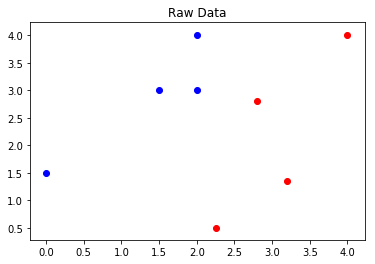

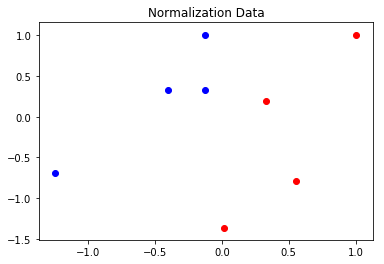

The cost in the 0 th iteration is 5.545177
The cost in the 1 th iteration is 4.508631
The cost in the 2 th iteration is 3.778488
The cost in the 3 th iteration is 3.251258
The cost in the 4 th iteration is 2.858391
The cost in the 5 th iteration is 2.556472
The cost in the 6 th iteration is 2.317958
The cost in the 7 th iteration is 2.125002
The cost in the 8 th iteration is 1.965707
The cost in the 9 th iteration is 1.831916
The cost in the 10 th iteration is 1.717881
The cost in the 11 th iteration is 1.619448
The cost in the 12 th iteration is 1.533547
The cost in the 13 th iteration is 1.457865
The cost in the 14 th iteration is 1.390625
The cost in the 15 th iteration is 1.330445
The cost in the 16 th iteration is 1.276226
The cost in the 17 th iteration is 1.227092
The cost in the 18 th iteration is 1.182330
The cost in the 19 th iteration is 1.141356
The cost in the 20 th iteration is 1.103689
The cost in the 21 th iteration is 1.068924
The cost in the 22 th iteration is 1.03672

TypeError: predict() missing 1 required positional argument: 'Y'

In [18]:
# 6完整实例
import numpy as np
import matplotlib.pyplot as plt
if __name__=="__main__":
    # X为横坐标，Y为纵坐标
    X = [0, 1.5, 2, 2, 2.25, 2.8, 3.2, 4]
    Y = [1.5, 3, 4, 3, 0.5, 2.8, 1.35, 4]
    label = [1, 1, 1, 1, 0, 0, 0, 0]
    label_color=['blue','red']
    color=[]
    for i in label:
        if i==1:
            color.append(label_color[0])
        else:
            color.append(label_color[1])
    for i in range(len(X)):
        plt.scatter(X[i], Y[i], c = color[i])
    plt.title('Raw Data')
    plt.show()
    # 数据归一化
    X = np.array(X)
    Y = np.array(Y)
    X = (X - np.average(X))
    Y = (Y - np.average(Y))
    X = X / X.max()
    Y = Y / Y.max()
    for i in range(len(X)):
        plt.scatter(X[i], Y[i], c = color[i])
    plt.title('Normalization Data')
    plt.show()
    data_X = np.vstack((X, Y))
    data_label = np.array([label])
    # 参数设置
    w=[]
    b=[]
    Y_prediction=[]
    iters=50
    learning_rate=0.25
    w,b=initializeParamWithZeros(data_X.shape[0])
    w,b,gradients,costs=Optimize(w,b,data_X,data_label,iters,learning_rate)
    Y_prediction=predict(w,b,data_X)
    

In [19]:
#测试输入数据
point = input("Please enter a coordinates:\n")
#获取坐标
x = int(point.split(' ')[0])
y = int(point.split(' ')[1])
point_data = np.vstack((x,y))
point_prediction = predict(w,b,point_data)
print("The point is below to" ,end=" ")
print(point_prediction[0,0])


Please enter a coordinates:
0 0


TypeError: predict() missing 1 required positional argument: 'Y'